<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 55.2 MB/s 
     |████████████████████████████████| 11.2 MB 42.4 MB/s 
     |████████████████████████████████| 718 kB 57.0 MB/s 
     |████████████████████████████████| 930 kB 53.7 MB/s 
     |████████████████████████████████| 750.6 MB 8.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639341 sha256=8bb0a4e6c50d702ce71eb0cbf49a160399a977f96e61e1a017aadaf1d98746ce
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 

In [ ]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import math
import pandas as pd
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



Я выбрала временные ряды на [предложенном сайте](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc).

Первый временной ряд: U.S. nuclear capacity, Daily .

Второй временной ряд: Imports of all grades of crude oil from World to Total U.S. (US), Monthly.

Код считывания временных рядов с сайта, их дополнительной обработки и разделения на train/test приведен ниже.

In [ ]:
# скачаем данные
# !wget timeseries1_link
# !wget timeseries2_link 

In [ ]:
# считаем файлы
ts1 = pd.read_csv('https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv',
            header=None, 
            names=['day', 'nuclear_capacity'], skiprows=1) #.set_index('year')

ts2 = pd.read_csv('https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Imports%20Crude%20Oil.csv',
            header=None, 
            names=['month', 'oil_imports'], skiprows=1)

In [ ]:
# приведем колонки со временем к нужному формату
ts1.day = pd.to_datetime(ts1.day.apply(lambda x: x[:4] + '-' + x[5:7] + '-' + x[7:-3])).dt.date

ts2.month = pd.to_datetime(ts2.month).dt.date 

In [ ]:
# сделаем разбиение на train/test
test_size_1 = int(ts1.shape[0] * 0.2)

train_ts1 = ts1[:-test_size_1]
test_ts1 = ts1[-test_size_1:]

test_size_2 = int(ts2.shape[0] * 0.2)

train_ts2 = ts2[:-test_size_2]
test_ts2 = ts2[-test_size_2:]

In [ ]:
train_ts1.shape, test_ts1.shape 

((4180, 2), (1045, 2))

In [ ]:
train_ts2.shape, test_ts2.shape

((116, 2), (29, 2))

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

Построим график ряда с ежедневными данными:

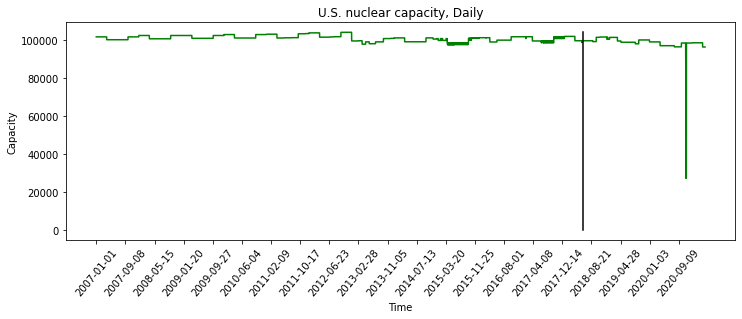

In [ ]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts1.day, ts1.nuclear_capacity, 'green')
plt.plot([ts1.day[4181], ts1.day[4181]], [0, ts1.nuclear_capacity.max()], 'black')
plt.xticks(ts1.day[::250], rotation=50)
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.title('U.S. nuclear capacity, Daily')
plt.show()

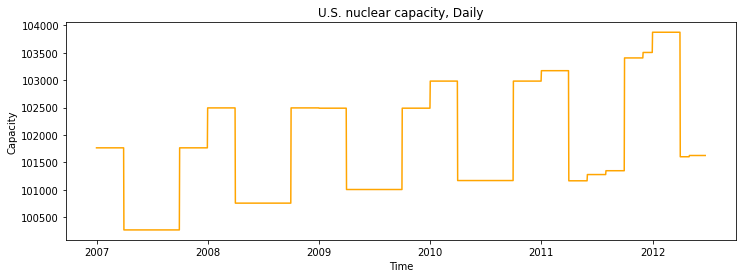

In [ ]:
# приблизим
plt.figure(figsize=(12, 4))
plt.plot(ts1.day[:2000], ts1.nuclear_capacity[:2000], 'orange')
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.title('U.S. nuclear capacity, Daily')
plt.show()

Построим график ряда с ежемесячными данными:

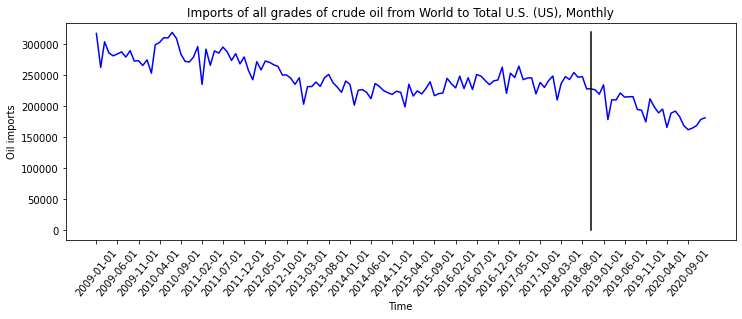

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(ts2.month, ts2.oil_imports, 'blue')
plt.plot([ts2.month[117], ts2.month[117]], [0, ts2.oil_imports.max()], 'black')
plt.xticks(ts2.month[::5], rotation=50)
plt.xlabel('Time')
plt.ylabel('Oil imports')
plt.title('Imports of all grades of crude oil from World to Total U.S. (US), Monthly')
plt.show()

Можно предположить, что в данных по месяцам есть такая сезонность (пунктирная линия приблизительно показывает конец первого периода), но из-за относительно небольшого объема данных, сказать наверняка ничего нельзя:

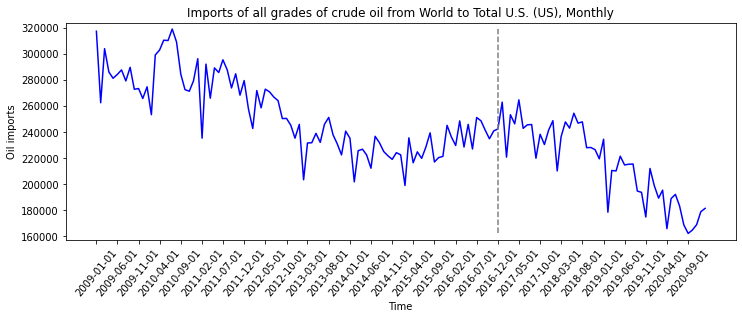

In [ ]:
idx = int(ts2.shape[0] * 0.35)
first_sp_end = ts2.iloc[-idx, 0]

plt.figure(figsize=(12, 4))
plt.plot(ts2.month, ts2.oil_imports, 'blue')
plt.plot([first_sp_end, first_sp_end], [ts2.oil_imports.min(), ts2.oil_imports.max()], 'grey', linestyle='--')
plt.ylim([ts2.oil_imports.min() - 5000, ts2.oil_imports.max() + 5000])
plt.xticks(ts2.month[::5], rotation=50)
plt.xlabel('Time')
plt.ylabel('Oil imports')
plt.title('Imports of all grades of crude oil from World to Total U.S. (US), Monthly')
plt.show()

Посмотрим на автокорреляционные функции:

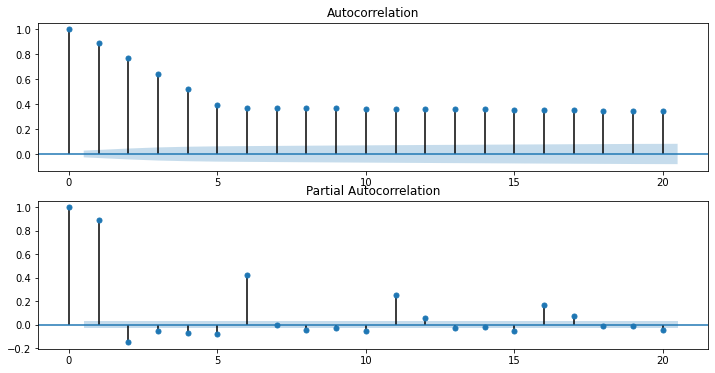

In [ ]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(ts1.nuclear_capacity, ax=ax[0], lags=20)
ax[1] = plot_pacf(ts1.nuclear_capacity, ax=ax[1], lags=20)
plt.show()

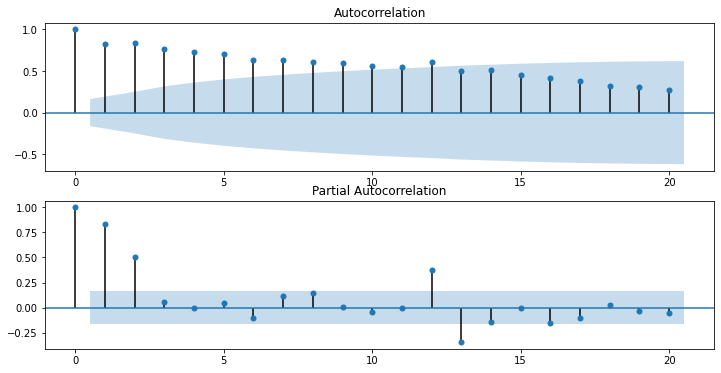

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(ts2.oil_imports, ax=ax[0], lags=20)
ax[1] = plot_pacf(ts2.oil_imports, ax=ax[1], lags=20)
plt.show()

На построенных выше графиках видно, что ряд с ежемесячными значениями все же скорее не имеет сезонности, в то время как в дневных данных сезонность присутствует. Исходя из графика, длина сезонной составляющей ряда составляет примерно год.

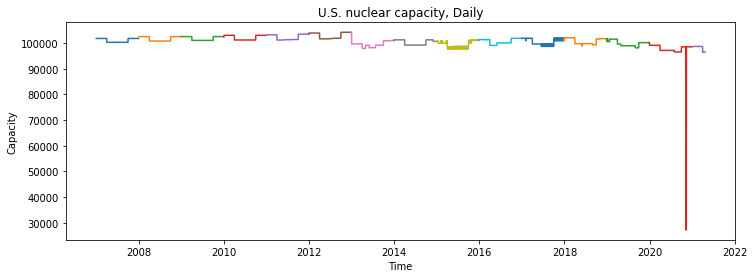

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
s = 365
sp = math.ceil(ts1.shape[0] / s) # number of seasonality periods

plt.figure(figsize=(12, 4))
for i in range(sp):
  plt.plot(ts1.iloc[i * s : (i + 1) * s, 0], ts1.iloc[i * s : (i + 1) * s, 1])

plt.xlabel('Time')
plt.ylabel('Capacity')
plt.title('U.S. nuclear capacity, Daily')
plt.show()

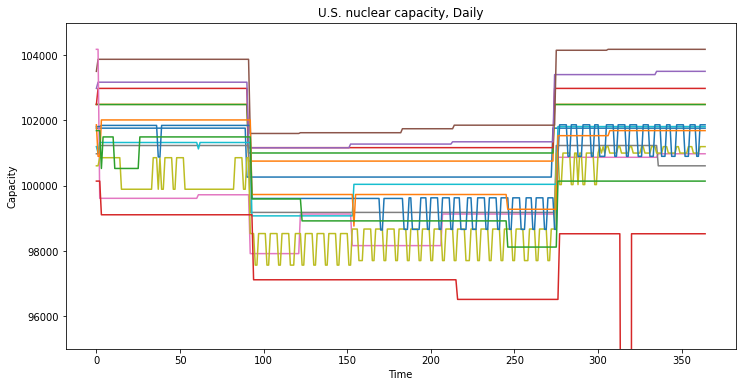

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(sp - 1):
  plt.plot(np.arange(365), ts1.iloc[i * s : (i + 1) * s, 1])

plt.ylim([95000, 105000])
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.title('Superimposed U.S. nuclear capacity, Daily')
plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

In [ ]:
ts2.head()

,month,oil_imports
0,2009 01,317275
1,2009 02,262339
2,2009 03,303897
3,2009 04,285934
4,2009 05,281147


### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
native_forecaster = NaiveForecaster(strategy='last', sp=1)
native_forecaster.fit(train_ts2.oil_imports)

ts2_pred_native = native_forecaster.predict(list(range(1, test_size_2 + 1)))

In [ ]:
# посчитайте метрики на test
native_forecaster_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_native)
native_forecaster_mae 

50757.8275862069

In [ ]:
# проделаем то же самое для второго наивного способа 
native_forecaster_s = NaiveForecaster(strategy='last', sp=12) # но вообще там нет сезонности, тем более, такой
native_forecaster_s.fit(train_ts2.oil_imports)

ts2_pred_native_s = native_forecaster_s.predict(list(range(1, test_size_2 + 1)))

native_forecaster_s_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_native_s)
native_forecaster_s_mae 

41728.44827586207

In [ ]:
# попробуем взять сезонность, которая, возможно, есть, исходя из рисунка в задании 2 
sp = ts2.shape[0] - idx

native_forecaster_s = NaiveForecaster(strategy='last', sp=sp)
native_forecaster_s.fit(train_ts2.oil_imports)

ts2_pred_native_s = native_forecaster_s.predict(list(range(1, test_size_2 + 1)))

native_forecaster_s_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_native_s)
native_forecaster_s_mae 

68933.93103448275

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь

# преобразуем pd.DataFrame в pd.Series
arima_train_ts2 = pd.Series(data=train_ts2.oil_imports.values, index=pd.PeriodIndex(train_ts2.month, freq='M'))

arima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True, scoring='mae')

# обучение модели
arima.fit(arima_train_ts2)

ARIMA(order=(1, 1, 1), scoring='mae', seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  116
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1270.042
Date:                             Sun, 24 Apr 2022   AIC                           2550.085
Time:                                     12:47:42   BIC                           2563.810
Sample:                                          0   HQIC                          2555.656
                                             - 116                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -740.2400   1628.282     -0.455      0.649   -3931.614    2451.134
ar.L1         -0.4452      0.164     -2.714      0.007      -0.767      -0.124
ma.L1          0.2032      0.179      1.135      0.257      -0.148       0.554
ar.S.L12       0.1502      0.019      7.838      0.000       0.113       0.188
sigma2      2.123e+08      0.024   8.69e+09      0.000    2.12e+08    2.12e+08
===================================================================================
Ljung-Box (L1) (Q):                  10.39   Jarque-Bera (JB):                10.32
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.59   Skew:                            -0.48
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.28e+25. Standard errors may be unstable.
"""

In [ ]:
from sktime.forecasting.base import ForecastingHorizon

# преобразуем pd.DataFrame в pd.Series
arima_test_ts2 = pd.Series(data=test_ts2.oil_imports.values, index=pd.PeriodIndex(test_ts2.month, freq='M'))

# подготовим свой формат для прогноза
fh = ForecastingHorizon(arima_test_ts2.index, is_relative=False)

# получим прогноз
ts2_pred_arima = arima.predict(fh)

In [ ]:
# посчитайте метрики на test
arima_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_arima)
arima_mae 

41661.40441046169

In [ ]:
# обучим теперь AutoArima

auto_arima = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=2, max_d=1, max_q=0, 
                       start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, 
                       suppress_warnings=True, stepwise=False, n_jobs=-1)

# обучение модели
auto_arima.fit(arima_train_ts2)

AutoARIMA(D=1, max_P=1, max_Q=0, max_d=1, max_p=2, max_q=0, n_jobs=-1,
          start_Q=0, start_p=1, start_q=0, stepwise=False,
          suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1276.953
Date:                Sun, 24 Apr 2022   AIC                           2559.907
Time:                        13:01:05   BIC                           2568.142
Sample:                             0   HQIC                          2563.249
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -481.0207   1278.752     -0.376      0.707   -2987.328    2025.287
ar.L1         -0.2878      0.018    -16.041      0.000      -0.323      -0.253
sigma2      2.171e+08      0.014   1.54e+10      0.000    2.17e+08    2.17e+08
===================================================================================
Ljung-Box (L1) (Q):                  10.34   Jarque-Bera (JB):                 7.51
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.62   Skew:                            -0.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.02e+25. Standard errors may be unstable.
"""

In [ ]:
# получим прогноз
ts2_pred_auto_arima = auto_arima.predict(fh)

auto_arima_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_auto_arima)
auto_arima_mae 

44848.965133371974

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.models import LGT
from orbit.models import DLT

# ваш код обучения моделей здесь
dlt = DLT(
    response_col='oil_imports', 
    date_col='month',
    # seasonality=52 
)

# обучаем модель
dlt.fit(df=train_ts2)

# делаем прогноз
ts2_pred_dlt = dlt.predict(df=test_ts2)

# выводим таблицу прогноза (прогноз и его доверительные интервалы)
ts2_pred_dlt.head() 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


,month,prediction_5,prediction,prediction_95
0,2018-09-01,226461.211119,249895.468172,272417.198449
1,2018-10-01,222614.770176,248623.454192,280989.396466
2,2018-11-01,214695.951604,251755.253787,279983.418017
3,2018-12-01,217782.244037,247921.147735,280737.768586
4,2019-01-01,220588.832765,248739.194534,281436.890719


In [ ]:
# посчитайте метрики на test 
dlt_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_dlt.prediction)
dlt_mae

56207.269005607595

In [ ]:
# проделаем то же самое для LGT
lgt = DLT(
    response_col='oil_imports', 
    date_col='month',
    estimator='stan-map',
    # seasonality=52,
    seed=8888
)

# обучаем модель
lgt.fit(df=train_ts2)

# делаем прогноз
ts2_pred_lgt = lgt.predict(df=test_ts2)

# посчитайте метрики на test
lgt_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_lgt.prediction)
lgt_mae 

49598.00062452619

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing 
from sktime.forecasting.ets import AutoETS 

# ваш код обучения моделей здесь
ets = ExponentialSmoothing(trend='additive', seasonal='additive')#, sp=1)
ets.fit(arima_train_ts2)

ts2_pred_ets = ets.predict(fh)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [ ]:
# посчитайте метрики на test
ets_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_ets)
ets_mae 

37488.205023972754

In [ ]:
# теперь то же самое для AutoETS
auto_ets = AutoETS(auto=True, n_jobs=-1)#, sp=1)
auto_ets.fit(arima_train_ts2)

ts2_pred_auto_ets = auto_ets.predict(fh)

auto_ets_mae = mean_absolute_error(test_ts2.oil_imports, ts2_pred_auto_ets)
auto_ets_mae 

48825.723970773084

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

Лучше всего себя показала ETS модель.

In [ ]:
# upper_int = ts2_pred_ets.quantile(q=0.9)

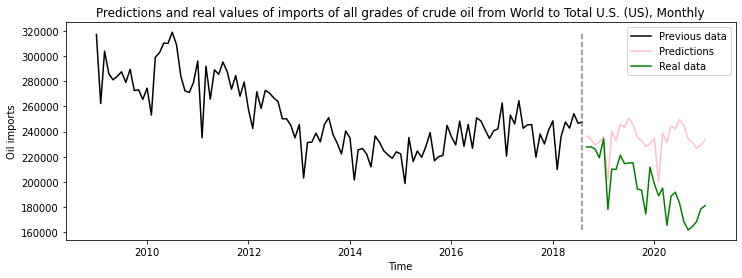

In [ ]:
# нарисуйте пресказания

plt.figure(figsize=(12, 4))
plt.plot(train_ts2.month, train_ts2.oil_imports, 'black', label='Previous data')
plt.plot([train_ts2.iloc[-1, 0], train_ts2.iloc[-1, 0]], [ts2.oil_imports.min(), ts2.oil_imports.max()], 'grey', linestyle='--')
plt.plot(test_ts2.month, ts2_pred_ets.values, 'pink', label='Predictions')
plt.plot(test_ts2.month, test_ts2.oil_imports, 'green', label='Real data')
plt.xlabel('Time')
plt.ylabel('Oil imports')
plt.title('Predictions and real values of imports of all grades of crude oil from World to Total U.S. (US), Monthly')
plt.legend()
plt.show()

# from orbit.diagnostics.plot import plot_predicted_data

# plot_predicted_data(
#     training_actual_df=pd.DataFrame(train_ts2, columns=['oil_imports']), predicted_df=pd.DataFrame(ts2_pred_ets, columns=['oil_imports']),
#     date_col=dlt.date_col, actual_col=dlt.response_col,
#     # date_col=arima_train_ts2.index.values, actual_col=arima_train_ts2.values,
#     test_actual_df=pd.DataFrame(arima_test_ts2, columns=['oil_imports'])
# )

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
native_forecaster = NaiveForecaster(strategy='last', sp=1)
native_forecaster.fit(train_ts1.nuclear_capacity) 

ts1_pred_native = native_forecaster.predict(list(range(1, test_size_1 + 1)))

In [ ]:
# посчитайте метрики на test
native_forecaster_mae = mean_absolute_error(test_ts1.nuclear_capacity, ts1_pred_native)
native_forecaster_mae 

1665.9701435406728

In [ ]:
# проделаем то же самое для второго наивного способа, seasonality = 365 days 
native_forecaster_s = NaiveForecaster(strategy='last', sp=365)
native_forecaster_s.fit(train_ts1.nuclear_capacity)

ts1_pred_native_s = native_forecaster_s.predict(list(range(1, test_size_1 + 1)))

native_forecaster_s_mae = mean_absolute_error(test_ts1.nuclear_capacity, ts1_pred_native_s)
native_forecaster_s_mae 

2043.1231578947388

In [ ]:
# попробуем так же посмотреть на такую сезонность: seasonality = 7 days
native_forecaster_ss = NaiveForecaster(strategy='last', sp=7)
native_forecaster_ss.fit(train_ts1.nuclear_capacity)

ts1_pred_native_ss = native_forecaster_ss.predict(list(range(1, test_size_1 + 1)))

native_forecaster_ss_mae = mean_absolute_error(test_ts1.nuclear_capacity, ts1_pred_native_ss)
native_forecaster_ss_mae 

1665.9701435406728

### KTR из orbit (1 балл).



In [ ]:
from orbit.models import KTR 

# ваш код обучения моделей здесь
ktr = KTR(
    response_col='nuclear_capacity',
    date_col='day',
    prediction_percentiles=[5.0, 95.0],
    seed=2021 
)
ktr.fit(df=train_ts1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.
INFO:root:Guessed max_plate_nesting = 1


In [ ]:
# посчитайте метрики на test
ts1_pred_ktr = ktr.predict(test_ts1)

ktr_mae = mean_absolute_error(test_ts1.nuclear_capacity, ts1_pred_ktr.prediction)
ktr_mae 

2482.6573198985166

In [ ]:
# попробуем взять KTRLite
from orbit.models.ktrlite import KTRLite

ktr_lite = KTRLite(
    response_col='nuclear_capacity',
    date_col='day',
    prediction_percentiles=[5.0, 95.0],
    seed=2021
)
ktr_lite.fit(df=train_ts1)

ts1_pred_ktr_lite = ktr_lite.predict(test_ts1)

ktr_lite_mae = mean_absolute_error(test_ts1.nuclear_capacity, ts1_pred_ktr_lite.prediction)
ktr_lite_mae 

2487.7528598981166

### Phophet (1 балл).



In [ ]:
from prophet import Prophet 

# ваш код обучения моделей здесь

# приведем временной ряд к нужному формату
train_ts1_prophet = train_ts1[['day', 'nuclear_capacity']]
train_ts1_prophet.columns = ['ds', 'y']

# инициализируем модель
model = Prophet(interval_width=0.9)

# обучаем модель
model.fit(train_ts1_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# сделаем прогноз
future = test_ts1[['day']]
future.columns = ['ds']

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-06-12,99864.258103,99227.492852,100506.013074
1,2018-06-13,99865.628627,99158.101555,100536.125224
2,2018-06-14,99866.327522,99216.309152,100498.582829
3,2018-06-15,99850.603917,99239.409199,100465.943769
4,2018-06-16,99760.974176,99055.908164,100476.345949


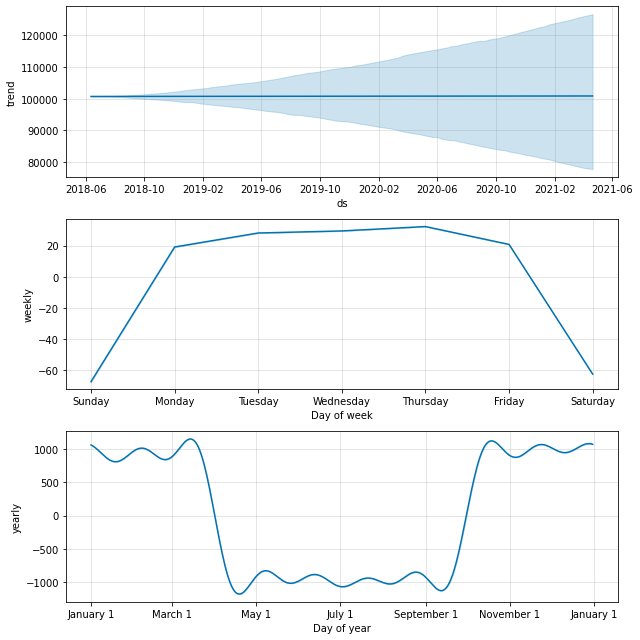

In [ ]:
# даже можем вывести компоненты прогноза
fig2 = model.plot_components(forecast)

In [ ]:
# посчитайте метрики на test
prophet_mae = mean_absolute_error(test_ts1.nuclear_capacity, forecast.yhat)
prophet_mae

2110.629616647372

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

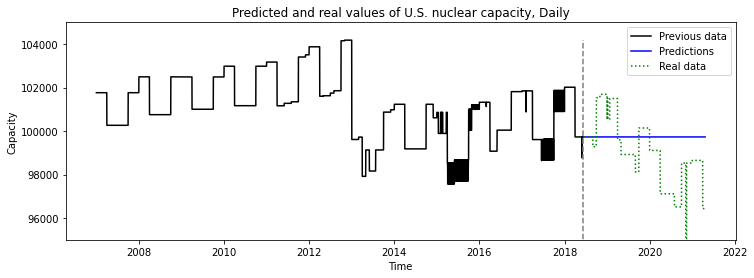

In [ ]:
# нарисуйте пресказания
plt.figure(figsize=(12, 4))
plt.plot(train_ts1.day, train_ts1.nuclear_capacity, 'black', label='Previous data')
plt.plot([train_ts1.iloc[-1, 0], train_ts1.iloc[-1, 0]], [ts1.nuclear_capacity.min(), ts1.nuclear_capacity.max()], 'grey', linestyle='--')
plt.plot(test_ts1.day, ts1_pred_native.values, 'blue', label='Predictions')
plt.plot(test_ts1.day, test_ts1.nuclear_capacity, 'green', linestyle=':',  label='Real data')
plt.ylim([95000, 105000])
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.title('Predicted and real values of U.S. nuclear capacity, Daily')
plt.legend()
plt.show()

Построим также график предсказаний, полученных Prophet, несмотря на то что значение метрики получилось немного хуже.

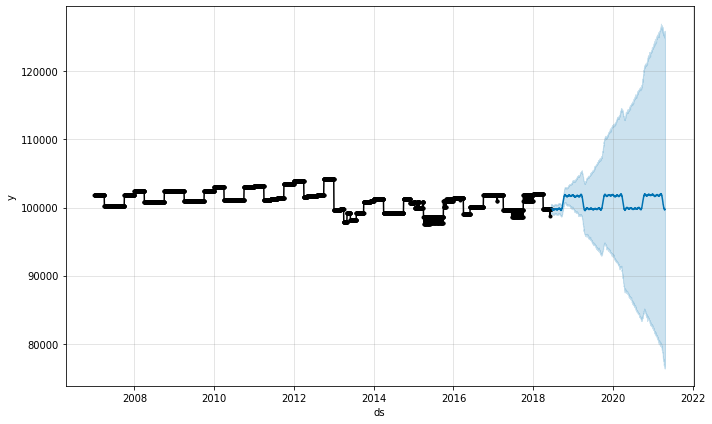

In [ ]:
fig1 = model.plot(forecast)
plt.plot(train_ts1.day, train_ts1.nuclear_capacity, 'black')

plt.show()

Видно, что модель уловила некоторые закономерности.

In [ ]:
# test_ts1.nuclear_capacity.replace(test_ts1.nuclear_capacity.min(), test_ts1.nuclear_capacity.mean(), inplace=True)

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

Я обучу обычную модель линейной регрессии, но сделаю это двумя способами:

1. в первом случае обучу модель на векторе-признаке, указывающем на номер соответствующего месяца

2. во втором случае вектором-признаком будет являться вектор с индексами строк. 

In [ ]:
# обучите классические модели ML
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

feature = pd.DataFrame(pd.to_datetime(ts2.month).dt.month)
y = np.array(ts2.oil_imports)

# первая модель
x_train, x_test, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=42)

# построим линейную модель
model_linear = sm.OLS(y_train, x_train).fit()

In [ ]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              349.5
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    1.17e-36
Time:                        16:16:44   Log-Likelihood:                         -1522.3
No. Observations:                 116   AIC:                                      3047.
Df Residuals:                     115   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month       2.832e+04   1514.963     18.695      0.000    2.53e+04    3.13e+04
==============================================================================
Omnibus:                       20.873   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.388
Skew:                          -0.071   Prob(JB):                       0.0676
Kurtosis:                       1.954   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_linear_pred = model_linear.predict(y_test)
model_linear_mae = mean_absolute_error(y_test, model_linear_pred)
model_linear_mae 

6825272187.366173

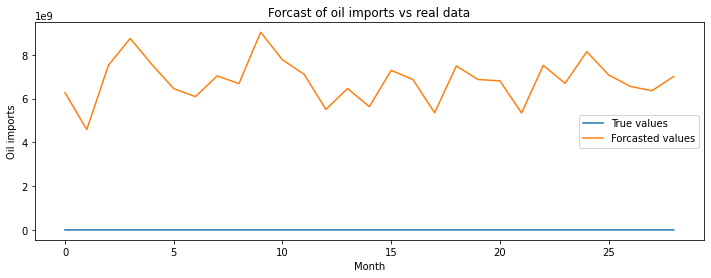

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True values')
plt.plot(model_linear_pred, label='Forcasted values')
plt.xlabel('Month')
plt.ylabel('Oil imports')
plt.title('Forcast of oil imports vs real data')
plt.legend()

plt.show()

In [ ]:
# вторая модель
model_linear_idx = sm.OLS(y_train, x_train.index.values).fit()

In [ ]:
model_linear_idx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              194.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    1.82e-26
Time:                        16:28:07   Log-Likelihood:                         -1545.8
No. Observations:                 116   AIC:                                      3094.
Df Residuals:                     115   BIC:                                      3096.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2334.2789    167.442     13.941      0.000    2002.609    2665.949
==============================================================================
Omnibus:                       13.577   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.347
Skew:                           0.002   Prob(JB):                        0.114
Kurtosis:                       2.052   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_linear_idx_pred = model_linear_idx.predict(y_test)
model_linear_idx_mae = mean_absolute_error(y_test, model_linear_idx_pred)
model_linear_idx_mae

562314904.6540028

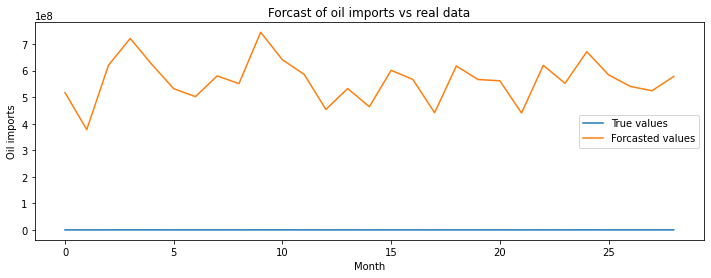

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test, label='True values')
plt.plot(model_linear_idx_pred, label='Forcasted values')
plt.xlabel('Month')
plt.ylabel('Oil imports')
plt.title('Forcast of oil imports vs real data')
plt.legend()

plt.show()

Из графиков и соответствующих значений метрики очевидно, что модели плохо справились со своей задачей, а точнее, не справились вовсе. Лучшими для данной задачи и выбранных в начале работы данных остаются специализированные модели.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания